In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model, 
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)



In [10]:
# View all of the classes that automap found
classes = Base.classes.keys()
classes

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [13]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd

In [14]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date 

'2017-08-23'

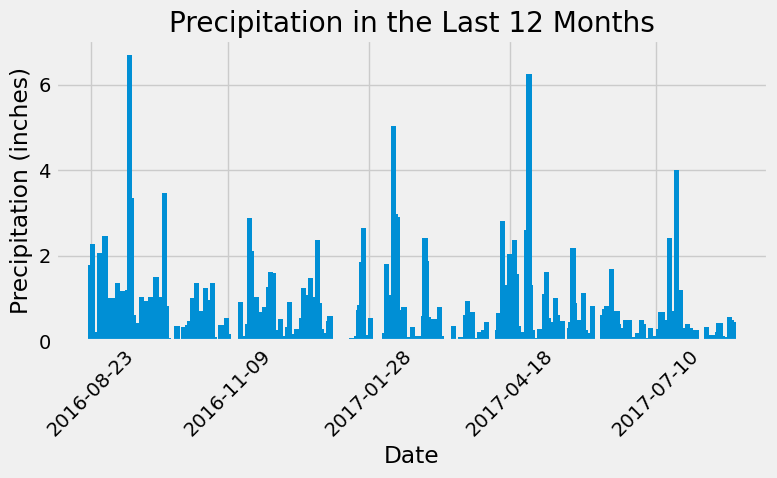

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year_ago
# Perform a query to retrieve the data and precipitation scores
precipitation_data_final_year = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= one_year_ago).\
order_by(Measurement.date).all()
precipitation_data_final_year

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_precipitation_final_year = pd.DataFrame(precipitation_data_final_year, columns=['Date', 'Precipitation'])
df_precipitation_final_year

# Sort the dataframe by date#This line should but the date frame in order by date "order_by(Measurement.date).all()""


# Use Pandas Plotting with Matplotlib to plot the data
selected_dates = ['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10']
# Sort the selected dates
selected_dates.sort()
plt.figure(figsize=(8, 5))
plt.bar(df_precipitation_final_year['Date'], df_precipitation_final_year['Precipitation'], width=3)
plt.title("Precipitation in the Last 12 Months")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.xticks(selected_dates,rotation=45)
plt.tight_layout()
plt.show()



In [23]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = df_precipitation_final_year['Precipitation'].describe()
summary_statistics

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [27]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
total_stations

9

In [29]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [35]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#Identify station with most temp observations 
most_active_station_id = 'USC00519281'
USC00519281_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                    filter(Measurement.station == most_active_station_id).all()
USC00519281_stats

[(54.0, 85.0, 71.66378066378067)]

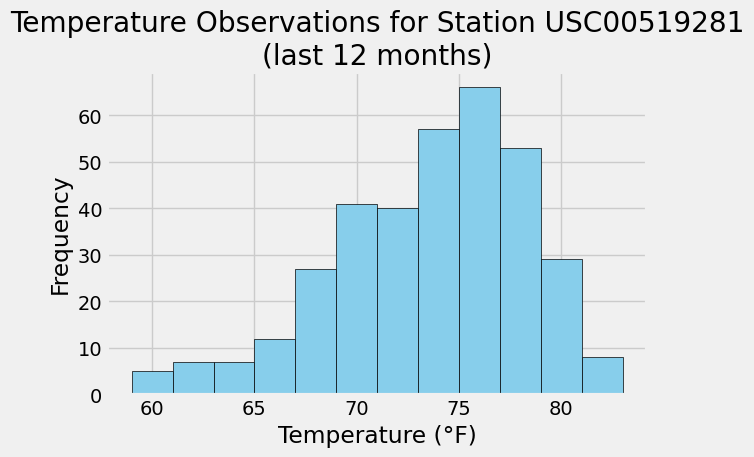

In [36]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = session.query(Measurement.date, Measurement.tobs).\
                    filter(Measurement.station == most_active_station_id).\
                    filter(Measurement.date >= one_year_ago).all()
dates = [result[0] for result in temperature_data]
temperatures = [result[1] for result in temperature_data]
plt.hist(temperatures, bins=12, color='skyblue', edgecolor='black')
plt.title(f'Temperature Observations for Station {most_active_station_id}\n(last 12 months)')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()